In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").order_by(Measurement.date.asc()).all()

In [5]:
#  3. Convert the June temperatures to a list.
june_list = [result[1] for result in june_results]

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd
june_df = pd.DataFrame({'June Temps': june_list})

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").order_by(Measurement.date.asc()).all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_list = [result[1] for result in dec_results]

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame({'December Temps': dec_list})

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional Queries

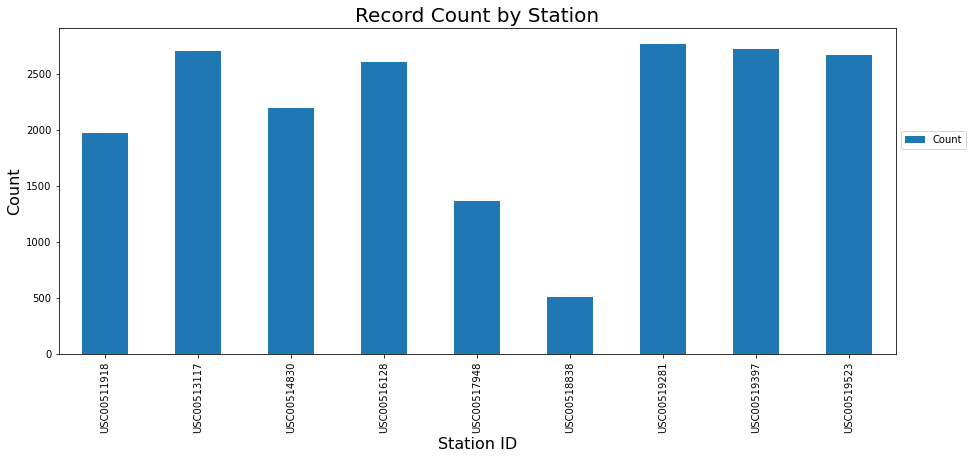

In [12]:
# Query the most active station in descending order.

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(Measurement.station.asc()).all()
active_station_list = [[station[0], station[1]] for station in active_station]
active_station_df = pd.DataFrame(active_station_list, columns=['Station ID', 'Count'])
active_station_df = active_station_df.set_index('Station ID')

active_station_df.plot.bar(figsize=(15, 6))
plt.title('Record Count by Station', fontsize=20)
plt.xlabel('Station ID', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(loc='best', bbox_to_anchor=(1, 0.7));

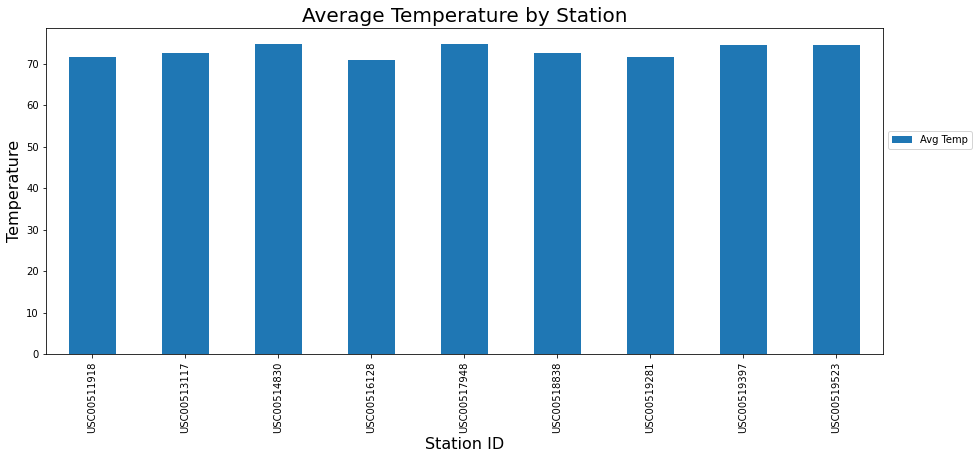

In [13]:
# Query and plot each station's average temperature record.

avg_tobs_by_station = session.query(Measurement.station, func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(Measurement.station.asc()).all()

avg_tobs_df = pd.DataFrame(avg_tobs_by_station, columns=['Station ID', 'Avg Temp'])
avg_tobs_df = avg_tobs_df.set_index('Station ID')

avg_tobs_df.plot.bar(figsize=(15, 6))
plt.title('Average Temperature by Station', fontsize=20)
plt.xlabel('Station ID', fontsize=16)
plt.ylabel('Temperature', fontsize=16)
plt.legend(loc='best', bbox_to_anchor=(1, 0.7));

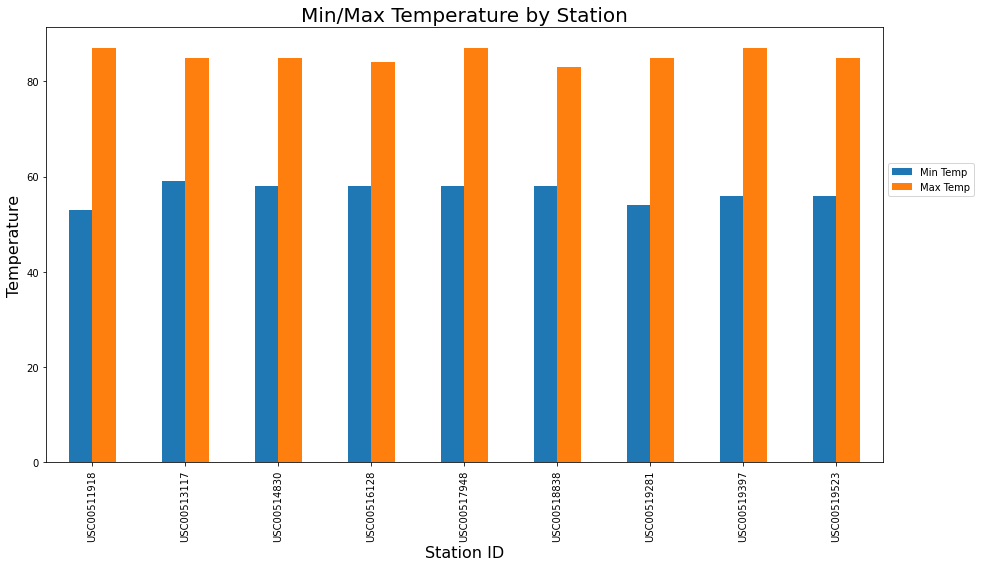

In [14]:
# Query and plot each station's minimum and maximum temperature record (ascending order by station id).

min_max_by_station = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs)).group_by(Measurement.station).order_by(Measurement.station.asc()).all()

min_max_df = pd.DataFrame(min_max_by_station, columns=['Station ID', 'Min Temp', 'Max Temp'])
min_max_df = min_max_df.set_index('Station ID')

min_max_df.plot.bar(figsize=(15, 8))
plt.title('Min/Max Temperature by Station', fontsize=20)
plt.xlabel('Station ID', fontsize=16)
plt.ylabel('Temperature', fontsize=16)
plt.legend(loc='best', bbox_to_anchor=(1, 0.7));